<img src="images/bannerugentdwengo.png" alt="Dwengo" width="600"/>

<div>
    <font color=#690027 markdown="1">
        <h1>MATRICES, BEWERKINGEN EN AFBEELDINGEN</h1> 
    </font>
</div>

<div class="alert alert-block alert-success">
Grijswaardenafbeeldingen of zwart-witafbeeldingen worden aan een computer gegeven in de vorm van een raster van getallen. In de wiskunde spreekt men van een <em>matrix</em>.<br>
    In de wiskundeles leer je wat de (wiskundige) dimensie is van een matrix, wat een symmetrische matrix is, en hoe je een matrix transponeert. Je leert ook matrices optellen en vermenigvuldigen. <br>
    Deze notebook verstrekt concrete voorbeelden van het werken met afbeeldingen en matrices. Je krijgt ook te zien welk effect een bewerking op een matrix heeft op de overeenkomstige afbeelding.
</div>

### Importeren van de nodige modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.ndimage

<div>
    <font color=#690027 markdown="1">
        <h2>1. Matrix</h2> 
    </font>
</div>

Hieronder volgt een tekening van een *geabstraheerde* boom waarin je slechts twee kleuren onderscheidt: wit en zwart. Heel wat details van een 'echte' boom zijn hier weggelaten. <br>De computer zal in de overeenkomstige matrixrepresentatie twee waarden onderscheiden: 0 voor zwart en 255 voor wit.<br><br>
Om grijstinten effectied te laten zien als grijstinten voeg je in de code `cmap="gray"` toe. `cmap` staat voor *colormap*. 

In de volgende twee code-cellen wordt geïlllustreerd. Voer ze uit.

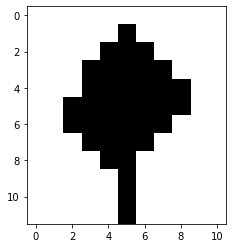

In [49]:
boom =  np.load("images/boom.npy")
plt.imshow(boom, cmap="gray")                 # cmap staat voor colormap

<div class="alert alert-block alert-info">
<b>Abstraheren</b> is bepaalde details van een probleem negeren zodat het gemakkelijker wordt om erover te redeneren.<br> <b>Abstractie</b> is een van de vier basisconcepten van computationeel denken.
</div>

In [3]:
print(boom)

[[255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255   0   0   0 255 255 255 255]
 [255 255 255   0   0   0   0   0 255 255 255]
 [255 255 255   0   0   0   0   0   0 255 255]
 [255 255   0   0   0   0   0   0   0 255 255]
 [255 255   0   0   0   0   0   0 255 255 255]
 [255 255 255   0   0   0   0 255 255 255 255]
 [255 255 255 255   0   0 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]]


<div class="alert alert-block alert-info">
    Het object waarnaar de variabele boom verwijst is een <b>matrix</b>, een raster van getallen (hier natuurlijke getallen). <br> Merk op dat de waarde 255 overeenkomt met wit en de waarde 0 met zwart. <br>
    Elke rij in de matrix komt overeen met een rij pixels.
</div>

Je kan de wiskundige dimensie van de matrix opvragen, maar ook het aantal elementen en welk type ze hebben.

In [4]:
print(boom.shape)                     # wiskundige dimensie van matrix 

(12, 11)


In [5]:
print(boom.size)                      # aantal elementen

132


In [6]:
print(boom.dtype)                     # type elementen

uint8


#### Opdracht 1
Hoeveel pixels bevat de figuur? 

Antwoord:

Antwoord: De figuur heeft evenveel pixels als er elementen in de afbeelding zijn, dus 132.

<div class="alert alert-block alert-warning">
    Je leert meer hierover in de notebook over grijswaardenafbeeldingen in het leerpad 'Digitale beelden'.
</div>

In de voorbeelden die volgen, zie je wat bewerkingen op een matrix zoals *transponeren* en de *scalaire vermenigvuldiging* betekenen voor de overeenkomstige afbeelding.

<div style='color: #690027;' markdown="1">
    <h2>2. Rekenkundige bewerkingen</h2> 
</div>

<div>
    <font color=#690027 markdown="1">
        <h3>2.1 Figuur met kleurschakeringen</h3> 
    </font>
</div>

Laad via de volgende code-cel eerst een afbeelding in die uit meer dan twee kleuren bestaat en bekijk ze.

In [11]:
boom2 = np.load("images/boom2.npy")

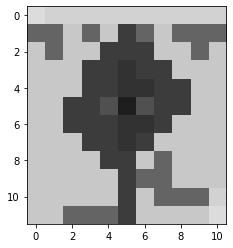

In [12]:
plt.imshow(boom2, vmin=0, vmax=255, cmap="gray")   # 0: zwart en 255: wit

<div class="alert alert-box alert-info">
    Door in het script vmin=0, vmax=255 toe te voegen, dwing je af dat 255 wit moet zijn en 0 zwart (zelfs als 0 en/of 255 niet voorkomen bij de pixelwaarden). Alle waarden ertussen zijn grijswaarden, verhoudingsgewijs. 
</div>

#### Opdracht 2.1
Hoe kan je zonder de afbeelding te bekijken nagaan dat de figuur uit meer dan 3 kleuren bestaat?

Antwoord:

Antwoord: Door naar de waarden in de overeenomstige matrix te kijken.

In [32]:
# voorbeeldscript
print(boom2)
boom2.dtype

[[220 210 210 210 210 210 210 210 210 210 210]
 [100 100 200 100 200  60 100 200 100 100 100]
 [200 100 200 200  60  60  60 200 200 100 200]
 [200 200 200  60  60  50  60  60 200 200 200]
 [200 200 200  60  60  50  50  60  60 200 200]
 [200 200  60  60  80  30  80  60  60 200 200]
 [200 200  60  60  60  50  50  60 200 200 200]
 [200 200 200  60  60  50  60 200 200 200 200]
 [200 200 200 200  60  60 200 100 200 200 200]
 [200 200 200 200 200  60 100 100 200 200 200]
 [200 200 200 200 200  60 200 100 100 100 210]
 [200 200 100 100 100  60 200 200 200 200 220]]


dtype('uint8')

Antwoord:

Antwoord: De pixelwaarden zijn 220, 210, 200, 100, 80, 60, 50 dus er zijn 7 grijstinten.

<div>
    <font color=#690027 markdown="1">
        <h3>2.2 Scalaire vermenigvuldiging</h3> 
    </font>
</div>

De scalaire vermenigvuldiging is de vermenigvuldiging met een scalair, of anders gezegd met een getal. <br>Als je een matrix vermenigvuldigt met een getal, dan wordt elk element van de matrix met dat getal verenigvuldigt.<br> Het resultaat is dus een matrix met dezelfde (wiskundige) dimensie als de oorspronkelijke matrix.

#### Opdracht 2.2
-  Wat zal er gebeuren met de kleuren van boom2 als je alle pixelwaarden halveert?

Antwoord: 

Antwoord: De figuur wordt donkerder van kleur. 

-  Controleer je vermoeden door Python te gebruiken.

[[110. 105. 105. 105. 105. 105. 105. 105. 105. 105. 105.]
 [ 50.  50. 100.  50. 100.  30.  50. 100.  50.  50.  50.]
 [100.  50. 100. 100.  30.  30.  30. 100. 100.  50. 100.]
 [100. 100. 100.  30.  30.  25.  30.  30. 100. 100. 100.]
 [100. 100. 100.  30.  30.  25.  25.  30.  30. 100. 100.]
 [100. 100.  30.  30.  40.  15.  40.  30.  30. 100. 100.]
 [100. 100.  30.  30.  30.  25.  25.  30. 100. 100. 100.]
 [100. 100. 100.  30.  30.  25.  30. 100. 100. 100. 100.]
 [100. 100. 100. 100.  30.  30. 100.  50. 100. 100. 100.]
 [100. 100. 100. 100. 100.  30.  50.  50. 100. 100. 100.]
 [100. 100. 100. 100. 100.  30. 100.  50.  50.  50. 105.]
 [100. 100.  50.  50.  50.  30. 100. 100. 100. 100. 110.]]


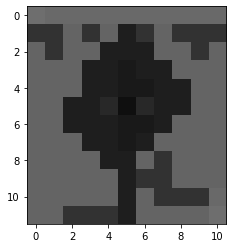

In [35]:
#voorbeeldscript
print(0.5 * boom2)                     # matrix vermenigvuldigd met een getal
plt.imshow(0.5 * boom2, vmin=0, vmax=255, cmap="gray") 

<div>
    <font color=#690027 markdown="1">
        <h3>2.3 Elk element vermeerderen met 50</h3> 
    </font>
</div>

Twee matrices met dezelfde (wiskundige) dimensie kan je bij elkaar optellen: alle overeenkomstige elementen worden dan opgeteld.<br> Het resultaat is dan een matrix met opnieuw dezelfde (wiskundige) dimensie.<br>
Je kan dus bij een matrix ook een even grote matrix optellen waarvan alle elementen dezelfde waarde hebben, bv. 50, zoals in de volgende opdracht.

#### Opdracht 5.3
-  Wat zal er gebeuren met de kleuren in boom2 als je alle pixelwaarden vermeerdert met 50?

Antwoord: 

Antwoord: De figuur wordt lichter van kleur. 

- Om dit te controleren met Python voer je de volgende code-cel uit.

[[ 14   4   4   4   4   4   4   4   4   4   4]
 [150 150 250 150 250 110 150 250 150 150 150]
 [250 150 250 250 110 110 110 250 250 150 250]
 [250 250 250 110 110 100 110 110 250 250 250]
 [250 250 250 110 110 100 100 110 110 250 250]
 [250 250 110 110 130  80 130 110 110 250 250]
 [250 250 110 110 110 100 100 110 250 250 250]
 [250 250 250 110 110 100 110 250 250 250 250]
 [250 250 250 250 110 110 250 150 250 250 250]
 [250 250 250 250 250 110 150 150 250 250 250]
 [250 250 250 250 250 110 250 150 150 150   4]
 [250 250 150 150 150 110 250 250 250 250  14]]


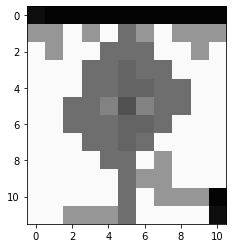

In [36]:
print(boom2 + 50)                     # elk element van matrix vermeerderd met zelfde getal
plt.imshow(boom2 + 50, vmin=0, vmax=255, cmap="gray") 

Merk op dat er in de code enkel `+ 50` staat, en geen matrix met alle elementen gelijk aan 50. Python interpreteert dit echter als een matrix met alle elementen 50 en met dezelfde (wiskundige) dimensie als de matrix waarmee moet worden opgeteld. 

<div>
    <font color=#690027 markdown="1">
        <h3>2.4 Oefening</h3> 
    </font>
</div>

-  Laad een grijswaardenafbeelding in van de Mona Lisa en laat ze zien. Je vindt het bestand `monalisa.npy` in de map `images`.

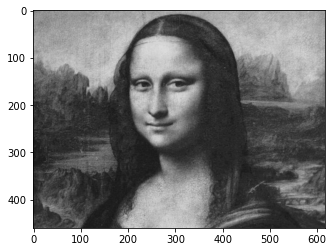

In [45]:
# voorbeeldscript
monalisa =  np.load("images/monalisa.npy")
plt.imshow(monalisa, vmin=0, vmax=255, cmap="gray")                 # cmap staat voor colormap

-  Bepaal de kleinste en de grootste pixelwaarde die voorkomt.

In [29]:
# voorbeeldscript
np.min(monalisa), np.max(monalisa)

(19, 221)

-  Maak de afbeelding lichter a.d.h.v. een geschikte Python-instructie. 

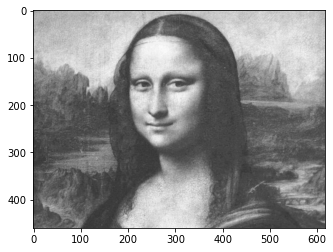

In [47]:
# voorbeeldscript
plt.imshow(monalisa + 30, vmin=0, vmax=255, cmap="gray")    

-  Maak de afbeelding donkerder a.d.h.v. een geschikte Python-instructie.

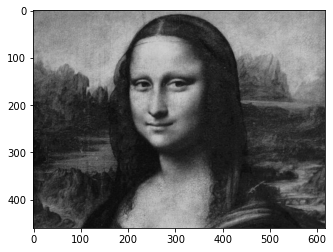

In [40]:
# voorbeeldscript
plt.imshow(monalisa - 14, vmin=0, vmax=255, cmap="gray")  

<div>
    <font color=#690027 markdown="1">
        <h2>3. Transponeren </h2> 
    </font>
</div>

Een getransponeerde matrix is de matrix die bekomen wordt door van rijen kolommen en van kolommen rijen te maken, waarbij de volgorde wordt behouden.

Voorbeeld: beschouw de matrix $\begin{bmatrix} -1 & 0 & 0 & 3 \\ 2 & -5 & 12 & 4 \\ 0 & 4 & -2 & 7\end{bmatrix} $.<br>
De getransponeerde matrix $\begin{bmatrix} -1 & 0 & 0 & 3 \\ 2 & -5 & 12 & 4 \\ 0 & 4 & -2 & 7\end{bmatrix}^{\large{T}} = \begin{bmatrix} -1 & 2 & 0 \\ 0 & -5 & 4 \\ 0 & 12 & -2 \\ 3 & 4 & 7 \end{bmatrix} $.

Hieronder kan je zien welk effect transponeren heeft op de afbeelding die overeenkomt met de matrix.

[[255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255   0   0 255 255 255 255 255]
 [255 255 255   0   0   0   0   0 255 255 255 255]
 [255 255   0   0   0   0   0   0   0 255 255 255]
 [255   0   0   0   0   0   0   0   0   0   0   0]
 [255 255   0   0   0   0   0   0 255 255 255 255]
 [255 255 255   0   0   0   0 255 255 255 255 255]
 [255 255 255 255   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255]]


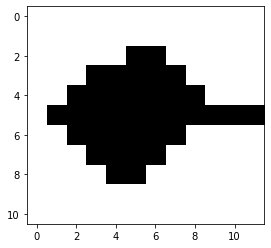

In [6]:
print(boom.T)                     # getransponeerde matrix: rijen worden kolommen en kolommen worden rijen
plt.imshow(boom.T, cmap="gray") 

<div class="alert alert-block alert-info">
Voor de mens is dit dezelfde boom, maar 90° gedraaid in tegenwijzerzin én gespiegeld t.o.v. een horizontale as. Voor de computer is dit echter een heel andere matrix.<br> In machinaal leren gebruikt men dergelijke technieken om extra data te creëren (<em>data augmentatie</em>). De dataset waarover men beschikt, wordt aangevuld met dezelfde afbeeldingen, maar dan gespiegeld, gedraaid enz.   
</div>

#### Opdracht 3.1
- Transponeer de Mona Lisa en laat de afbeelding zien.

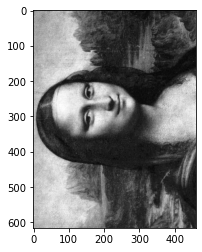

In [75]:
# voorbeeldscript
plt.imshow(monalisa.T, cmap="gray") 

#### Opdracht 3.1
- Transponeer de getransponeerde Mona Lisa en laat die afbeelding zien.

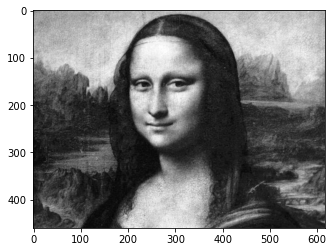

In [67]:
# voorbeeldscript
plt.imshow(monalisa.T.T, cmap="gray") 

<div style='color: #690027;' markdown="1">
    <h2>4. Spiegelen</h2> 
</div>

In de volgende code-cel wordt de boom *gespiegeld* om een horizontale as. 

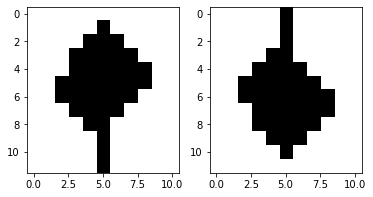

In [14]:
boom_x = np.flipud(boom)     # spiegeling om horizontale as (upside - down)

plt.figure(figsize=(6,9))
plt.subplot(1, 2, 1)
plt.imshow(boom, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(boom_x, cmap="gray")

In [9]:
print(boom_x)

[[255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255   0   0 255 255 255 255 255]
 [255 255 255   0   0   0   0 255 255 255 255]
 [255 255   0   0   0   0   0   0 255 255 255]
 [255 255   0   0   0   0   0   0   0 255 255]
 [255 255 255   0   0   0   0   0   0 255 255]
 [255 255 255   0   0   0   0   0 255 255 255]
 [255 255 255 255   0   0   0 255 255 255 255]
 [255 255 255 255 255   0 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255]]


#### Opdracht 4.1
Om te spiegelen om een verticale as, gebruik je de functie`fliplr()`, waarbij *lr* staat voor left-right.
- Spiegel de Mona Lisa om een verticale as en laat de afbeelding zien.

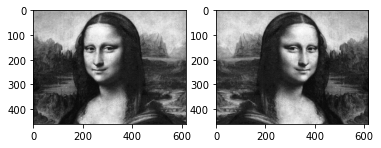

In [68]:
# voorbeeldscript
monalisa_y = np.fliplr(monalisa)     # spiegeling om verticale as (left-right)

plt.figure(figsize=(6,9))
plt.subplot(1, 2, 1)
plt.imshow(monalisa, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(monalisa_y, cmap="gray")

<div style='color: #690027;' markdown="1">
    <h2>5. Roteren</h2> 
</div>

M.b.v. de functie `rotate()` uit de module scipy.ndimage kan je een afbeelding draaien. Je kan kiezen over welke hoek, en zowel wijzerzin als tegenwijzerzin draaien. Net als in de wiskunde geeft een positieve hoek een rotatie in tegenwijzerzin.<br> De volgende code-cel geeft hiervan een voorbeeld. De code `reshape=False` geeft aan dat wat afgebeeld wordt dezelfde grootte moet behouden. Test dit eventueel eens uit door die code weg te halen.   

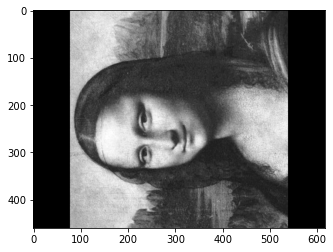

In [76]:
monalisa_draai90 = scipy.ndimage.rotate(monalisa, angle=90, reshape=False)
plt.imshow(monalisa_draai90, cmap="gray")

#### Opdracht 5.1
- Draai de Mona Lisa 45 graden in tegenwijzerzin.

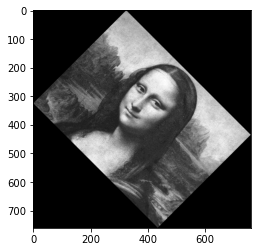

In [71]:
# voorbeeldscript
monalisa_draaimin45 = scipy.ndimage.rotate(monalisa, angle=-45)
plt.imshow(monalisa_draaimin45, cmap="gray")

- Draai de Mona Lisa 120 graden in wijzerzin.

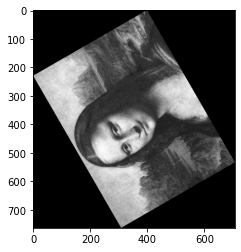

In [72]:
# voorbeeldscript
monalisa_draai120 = scipy.ndimage.rotate(monalisa, angle=120)
plt.imshow(monalisa_draai120, cmap="gray")

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 